In [1]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# read the excel file
csv_path = "SAND_USD_Coinbase_day_2022-09-30.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,3.15,3.15,3.15,3.15,3.118101,0
1,2010-07-02,3.25,3.25,3.10,3.10,3.068607,1700
2,2010-07-06,2.85,2.95,2.70,2.85,2.821139,26380
3,2010-07-07,3.00,3.30,3.00,3.15,3.118101,10280
4,2010-07-08,3.15,3.25,3.15,3.15,3.118101,5740


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3.084000e+03
mean,5.807519,5.924650,5.672409,5.797821,5.740787,1.175661e+06
std,2.216537,2.246343,2.170406,2.209059,2.187260,1.137464e+06
min,2.020000,2.100000,1.940000,2.020000,1.999544,0.000000e+00
25%,4.200000,4.297500,4.090000,4.180000,4.137671,4.276250e+05
50%,5.520000,5.630000,5.390000,5.510000,5.454203,9.899500e+05
75%,6.932500,7.072500,6.780000,6.902500,6.848437,1.593300e+06
max,15.170000,15.430000,14.710000,15.070000,14.917392,1.595140e+07


In [4]:
df=df.set_index('Date')
df.index

DatetimeIndex(['2010-07-01', '2010-07-02', '2010-07-06', '2010-07-07',
               '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
               '2010-07-14', '2010-07-15',
               ...
               '2022-09-16', '2022-09-19', '2022-09-20', '2022-09-21',
               '2022-09-22', '2022-09-23', '2022-09-26', '2022-09-27',
               '2022-09-28', '2022-09-29'],
              dtype='datetime64[ns]', name='Date', length=3084, freq=None)

In [5]:
y = df['Adj Close'].resample('MS').mean()
y['2010':]

Date
2010-07-01    3.047396
2010-08-01    3.273331
2010-09-01    3.888788
2010-10-01    3.492839
2010-11-01    3.417420
                ...   
2022-05-01    6.505175
2022-06-01    6.420428
2022-07-01    5.658931
2022-08-01    5.949308
2022-09-01    5.862680
Freq: MS, Name: Adj Close, Length: 147, dtype: float64

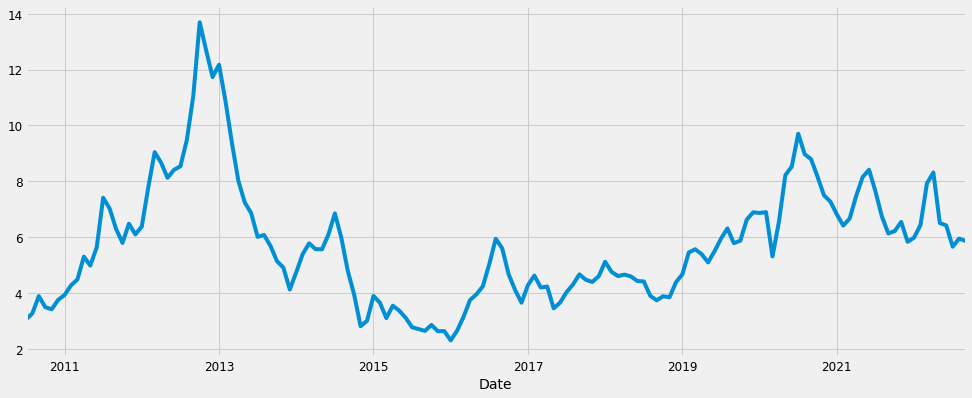

In [6]:
y.plot(figsize = (15, 6))
plt.show()

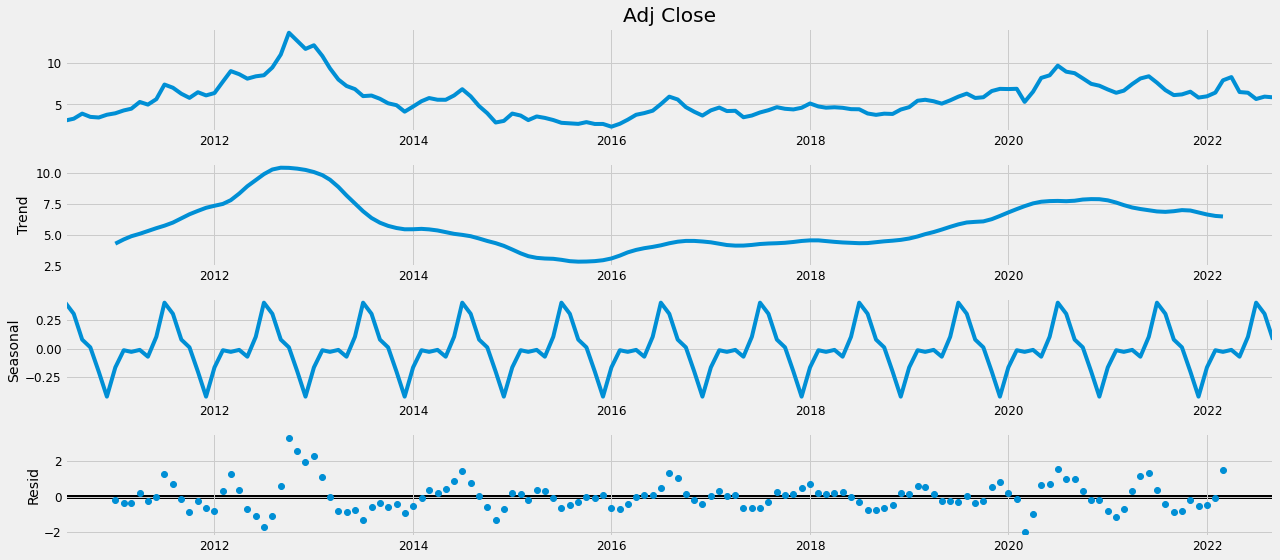

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [8]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:952.6378937495424
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:844.4279670311527
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:648.1092873694654
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:635.9387360974795
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:718.876605728766
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:719.866557730265
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:647.8314527962852
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:619.5404033569052
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:762.0109805561297
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:659.4346163257323
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:495.67420018384166
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:477.57710197136123
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:546.2019513011467


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:536.7891132649708
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:493.5604845936182
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:465.88754535639157
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:306.4981348654562
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:305.55521778754417
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:389.0935368131018
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:316.82269651971126
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:306.3477209058084
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:306.68794396513204
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:356.9396700514195
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:317.4777302999603
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:293.3795290609813
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:292.34834685553085
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:375.17833694178466
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:303.81576939248487
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:293.12447535868665
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:293.7354007569205
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:344.134239049196
ARI

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:316.6679088440489
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:391.10194845334775
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:318.4790185925099
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:314.04120831160003
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:314.5535542864745
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:360.4510715204574
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:319.12492734826094
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:300.62317871176566


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:303.4329051860146
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:373.75490939823055
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:304.02149087596047
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:300.5894005783694
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:301.39211090537844
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:345.5024639584307
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:304.6521548858507
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:296.07819982557857
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:295.1643779371654
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:377.8836173551246
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:306.23344544531165
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:295.82621842470985
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:296.68700810121845
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:345.80024815382484
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:306.5605041407092
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:293.22024526670407
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:292.30238773356297
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:376.2259915120685


In [10]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6902      0.062    -11.139      0.000      -0.812      -0.569
ma.L1          0.9986      0.346      2.886      0.004       0.320       1.677
ar.S.L12      -0.4762      0.067     -7.067      0.000      -0.608      -0.344
sigma2         0.6746      0.225      2.997      0.003       0.233       1.116


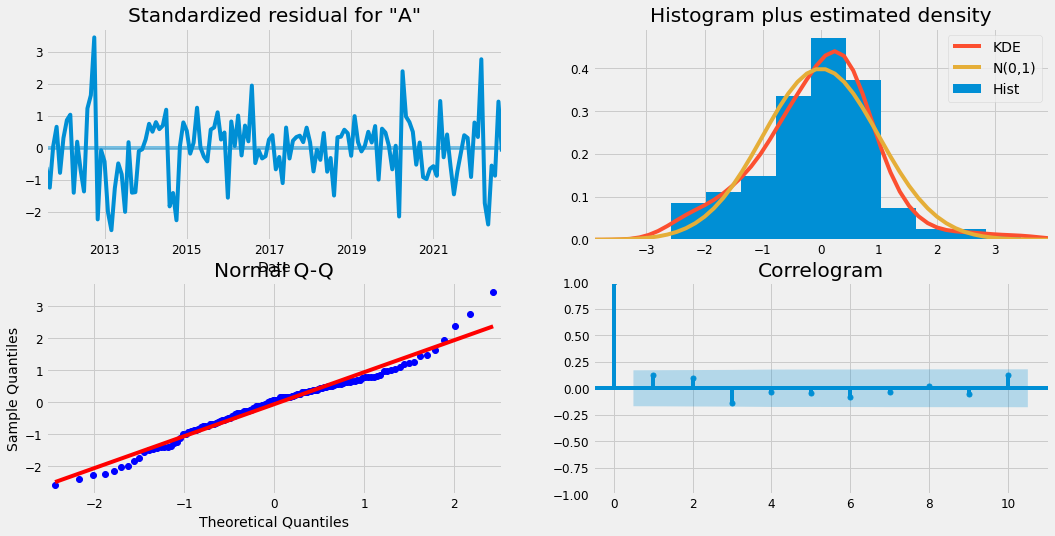

In [11]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [15]:
prediction = result.get_prediction(start = pd.to_datetime('2010-07-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,lower Adj Close,upper Adj Close
Date,,
2010-07-01,-2771.808365,2771.808365
2010-08-01,-1956.917601,1963.012393
2010-09-01,-1956.691666,1963.238328
2010-10-01,-1956.076209,1963.853786
2010-11-01,-1956.472158,1963.457836
...,...,...
2022-05-01,6.864727,10.094725
2022-06-01,5.262808,8.492707
2022-07-01,4.761354,7.991157


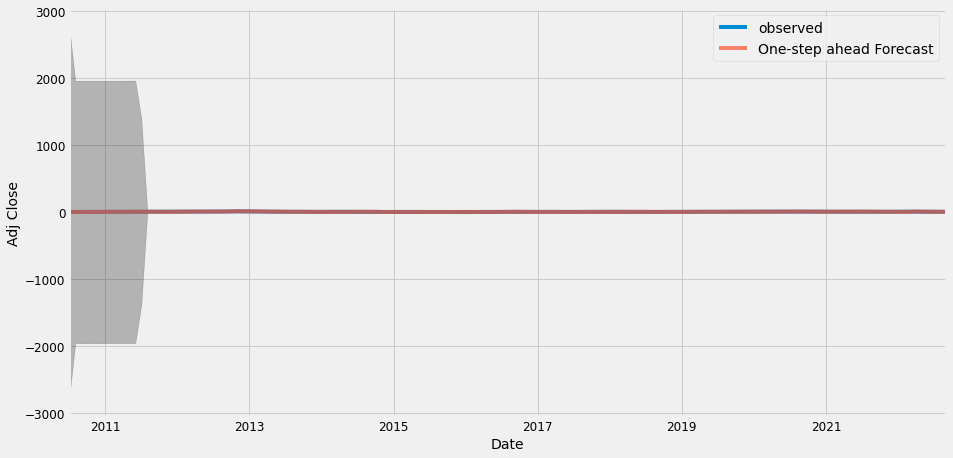

In [22]:
#Visualize the forecasting
ax = y['2010':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel("Date")
ax.set_ylabel('Adj Close')
plt.legend()
plt.show()

In [38]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2010-07-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.73
The Root Mean Squared Error of our forecasts is 0.85


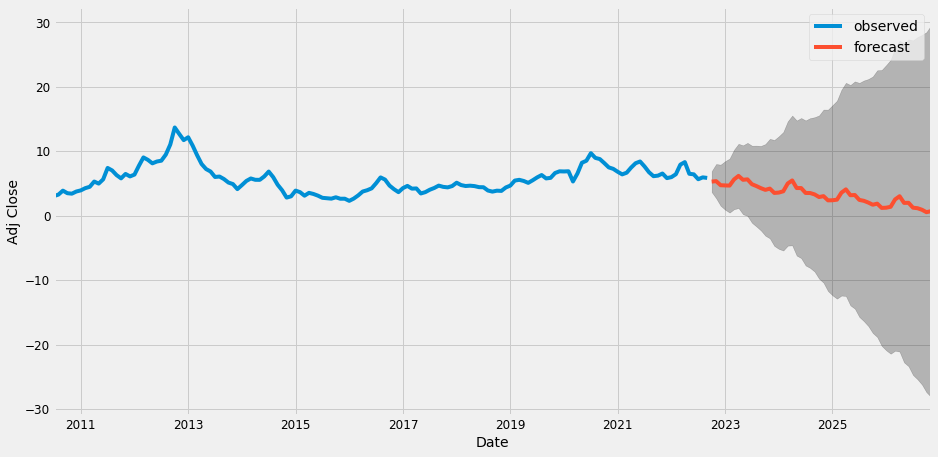

In [39]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')

plt.legend()
plt.show()